In [5]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [6]:
import torch

from config.model_config import ModelConfig
from config.experiment_config import ExperimentConfig, AvailableDatasets
from vol_predict.features.preprocessor import OneToOnePreprocessor
from vol_predict.loss.loss import Loss

from vol_predict.models.dl.lstm_predictor import LSTMPredictor as Model
from vol_predict.models.dl.mlp_predictor import MLPPredictor as Baseline

from run import initialize_runner, run_backtest

In [7]:
config = ExperimentConfig()
config.DATASET = AvailableDatasets.BITCOIN

model_params = ModelConfig()
baseline_params = ModelConfig()

# Handles the features
feature_processor = OneToOnePreprocessor()

runner = initialize_runner(
    model_config=model_params,
    preprocessor=feature_processor,
    experiment_config=config,
)

Train data on 2018-06-05 00:00:00 to 2018-08-31 22:00:00
Test data on 2018-09-15 01:00:00 to 2018-09-30 21:00:00
Num Train Iterations: 1937
Num Features: 1200


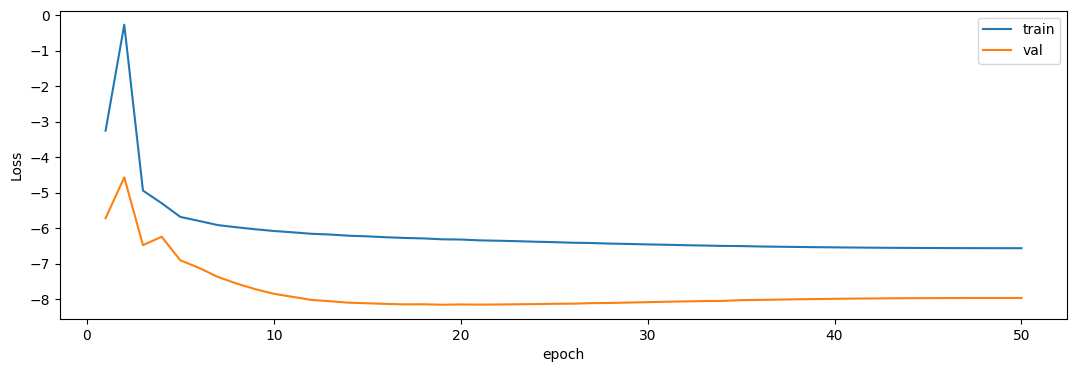

In [8]:
model_params.n_epochs = 10
model_params.hidden_size = 32
model_params.n_layers = 3
model_params.batch_size = 16
model_params.optimizer = torch.optim.Adam
model_params.loss = Loss.NLL

result = run_backtest(
    model_cls=Model,
    baseline_cls=Baseline,
    runner=runner,
)

In [9]:
result.model_result

AssessmentResult:
* mean_model_loss = -6.600429
* mean_val_loss = -6.600429
* mean_pred_vol = 1.1677745580673218
* mean_true_vol = 0.9400271773338318
* RMSEVolLoss = 0.003545967396

In [10]:
result.baseline_result

AssessmentResult:
* mean_model_loss = -6.737364
* mean_val_loss = -6.737364
* mean_pred_vol = 0.7251168489456177
* mean_true_vol = 0.9400271773338318
* RMSEVolLoss = 0.003531615250